## Introduction

- Welcome to Data Science with Timmy. 
- Here we are working on a dataset named Flood Prediction. 
- Dataset link: https://www.kaggle.com/competitions/playground-series-s4e5

## Procedure

### Data Understanding
- **Overview**
- Welcome to the 2024 Kaggle Playground Series! We plan to continue in the spirit of previous playgrounds, providing interesting an approachable datasets for our community to practice their machine learning skills, and anticipate a competition each month.

- **Your Goal**: The goal of this competition is to predict the probability of a region flooding based on various factors.
- **Flood detection** refers to the process of identifying, monitoring, and alerting authorities or individuals about the presence or likelihood of flooding in a particular area. It involves the use of various technologies and methods to detect, predict, and mitigate the impacts of floods.

### Let's read the data

In [2]:
# importing some libraries
import pandas as pd #for data manipulation
import numpy as np     #for numerical operations
import matplotlib.pyplot as plt    #for data visualization
import seaborn as sns   #for data visualization
# setting column width
pd.set_option('display.max_columns', None)

There are three files in the zip file.
- train.csv
- test.csv
- sample_submission.csv

In [3]:
# loading the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

Looking at the top 10 rows in each file

In [4]:
train.head(10)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415
5,5,5,4,1,4,2,4,6,6,7,5,5,3,5,5,4,4,6,8,3,2,0.440
6,6,8,3,1,2,3,7,3,4,6,7,5,2,5,6,4,5,6,3,4,6,0.460
7,7,6,6,5,7,5,5,3,5,5,5,3,5,3,5,5,8,6,8,5,6,0.595
8,8,5,2,8,5,4,5,2,4,5,5,2,9,2,7,3,4,6,4,5,5,0.505
9,9,4,2,3,5,8,6,5,5,7,6,4,6,3,3,4,4,3,3,5,6,0.455


In [5]:
test.head(10)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5
5,1117962,3,4,8,4,6,5,2,5,9,6,6,4,3,7,1,6,6,3,5,6
6,1117963,5,5,6,8,6,5,3,6,9,4,6,4,2,5,5,5,4,6,5,5
7,1117964,6,9,6,5,5,5,3,8,10,7,3,5,6,1,2,5,3,6,4,4
8,1117965,6,5,2,4,6,4,5,8,4,5,4,2,6,6,7,3,3,6,5,2
9,1117966,4,8,8,4,7,7,4,1,3,6,7,8,4,4,7,10,3,6,7,3


In [6]:
sample.head(10)

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5
5,1117962,0.5
6,1117963,0.5
7,1117964,0.5
8,1117965,0.5
9,1117966,0.5


What next? 

## Data Exploration 
- We want to see more about the data since we only just looked at it. 

In [7]:
# shape of our data
print(train.shape)
print(test.shape)

(1117957, 22)
(745305, 21)


Wow!!!!!
- We have quite a large data
- Training set has over 1 million rows and 22 columns
- Testing set has 700k plus rows and 21 columns.

- Why the difference in columns though? 
- That's because we have a target variable in our train set which is absent in the test set.

In [8]:
# checking for the columns in the dataset
train.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [9]:
test.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

What's the difference? 

Here is the difference:
- train set has Flood Probability
- test set does not have Flood Probability

What have I seen now? 
- The Flood Probability in my train set is the TARGET VARIABLE!!!!!!.
- In short We are to Predict the Flood Probability of the data points in the test data.

### Are we done with EDA? NO, Let's GOOO!!!!!!

- We are yet to fully understand our data of we don't know the features of our data very well.
- Let's do that!!!!!!

In [10]:
# looking at out features again
train.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

- Making Research on them. 
- Ask ChatGPT questions, relate it to the problem statement for better understanding. 

## Research Results

- Monsoon Intensity: This feature likely measures the strength or intensity of monsoon rains in the region. Monsoons are seasonal winds that bring heavy rainfall to certain parts of the world, often causing floods.

- Topography Drainage: This feature could represent the natural drainage characteristics of the area's topography, indicating how well water flows away from the land surface. Areas with poor drainage might be more prone to flooding.

- River Management: This feature might describe the effectiveness of river management practices in the region, such as dam construction, levees, and floodplain zoning.

- Deforestation: This feature likely measures the extent of deforestation in the area. Deforestation can increase surface runoff and soil erosion, contributing to flood risk.

- Urbanization: This feature may indicate the degree of urban development in the region. Urbanization often leads to increased impervious surfaces like pavement and buildings, which can exacerbate flooding by reducing natural infiltration and increasing runoff.

- Climate Change: This feature could represent the influence of climate change on flood risk factors, such as altered precipitation patterns, sea level rise, and increased frequency or intensity of extreme weather events.

- Dams Quality: This feature likely assesses the condition and effectiveness of dams in the region for flood control and water management purposes.

- Siltation: Siltation refers to the accumulation of sediment in rivers, reservoirs, and other water bodies. Excessive siltation can reduce water storage capacity and increase flood risk.

- Agricultural Practices: This feature may describe agricultural activities and land use practices that can impact flood risk, such as soil management, irrigation practices, and land drainage.

- Encroachments: This feature likely indicates the extent of encroachment or unauthorized occupation of floodplains and other natural waterways, which can exacerbate flood impacts.

- Disaster Preparedness: This feature could represent the level of preparedness and response capabilities of local authorities and communities in dealing with flood disasters.

- Drainage Systems: This feature may describe the condition and effectiveness of drainage infrastructure, including stormwater drains, culverts, and canals.

- Coastal Vulnerability: This feature likely assesses the susceptibility of coastal areas to flooding and storm surges, considering factors such as sea level rise, coastal erosion, and tidal patterns.

- Landslides: This feature may indicate the risk of landslides in the region, which can be triggered by heavy rainfall and contribute to downstream flooding.

- Watersheds: Watersheds are areas of land where all the water drains into a common outlet, such as a river or lake. This feature may represent the characteristics of watersheds in the region and their influence on flooding.

- Deteriorating Infrastructure: This feature likely describes the condition of critical infrastructure systems (e.g., roads, bridges, levees) that play a role in flood mitigation and response.

- Population Score: This feature may indicate population density or other demographic factors that can influence flood vulnerability and the potential impact on human lives and property.

- Wetland Loss: This feature likely measures the extent of wetland loss in the region, which can reduce natural flood storage capacity and increase flood risk.

- Inadequate Planning: This feature could represent deficiencies in land use planning, zoning regulations, and development policies that contribute to increased flood vulnerability.

- Political Factors: This feature may encompass political considerations and governance issues that affect flood risk management, such as corruption, regulatory enforcement, and allocation of resources.

- Flood Probability: This is likely the target variable you're trying to predict, representing the likelihood or probability of flooding occurring in a given area based on the combination of all the aforementioned factors.

## Is it Much? 

- Doesn't matter........
- What matters is that you understand your data. 


## Now what next? 

- MORE EDA,  we are just getting started.
- We just understood our data. 

In [11]:
# checking for the data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

Our EDA will be focused on the train set initially. 

- This EDA shows that we only have numerical features in out Data....

In [12]:
# checking for unique values in the dataset
train.nunique()

id                                 1117957
MonsoonIntensity                        17
TopographyDrainage                      19
RiverManagement                         17
Deforestation                           18
Urbanization                            18
ClimateChange                           18
DamsQuality                             17
Siltation                               17
AgriculturalPractices                   17
Encroachments                           19
IneffectiveDisasterPreparedness         17
DrainageSystems                         18
CoastalVulnerability                    18
Landslides                              17
Watersheds                              17
DeterioratingInfrastructure             18
PopulationScore                         19
WetlandLoss                             20
InadequatePlanning                      17
PoliticalFactors                        17
FloodProbability                        83
dtype: int64

In [13]:
# checking the data again.

train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


In [14]:
#  A lil preview of the data by performing the describe function
train.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,4.945239e+00,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,2.078141e+00,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [15]:
# displaying the min and max values of the dataset
train.min()

id                                 0.000
MonsoonIntensity                   0.000
TopographyDrainage                 0.000
RiverManagement                    0.000
Deforestation                      0.000
Urbanization                       0.000
ClimateChange                      0.000
DamsQuality                        0.000
Siltation                          0.000
AgriculturalPractices              0.000
Encroachments                      0.000
IneffectiveDisasterPreparedness    0.000
DrainageSystems                    0.000
CoastalVulnerability               0.000
Landslides                         0.000
Watersheds                         0.000
DeterioratingInfrastructure        0.000
PopulationScore                    0.000
WetlandLoss                        0.000
InadequatePlanning                 0.000
PoliticalFactors                   0.000
FloodProbability                   0.285
dtype: float64

In [16]:
train.max()

id                                 1117956.000
MonsoonIntensity                        16.000
TopographyDrainage                      18.000
RiverManagement                         16.000
Deforestation                           17.000
Urbanization                            17.000
ClimateChange                           17.000
DamsQuality                             16.000
Siltation                               16.000
AgriculturalPractices                   16.000
Encroachments                           18.000
IneffectiveDisasterPreparedness         16.000
DrainageSystems                         17.000
CoastalVulnerability                    17.000
Landslides                              16.000
Watersheds                              16.000
DeterioratingInfrastructure             17.000
PopulationScore                         18.000
WetlandLoss                             19.000
InadequatePlanning                      16.000
PoliticalFactors                        16.000
FloodProbabil

## Let's make some inference on what we've seen in our data.

- 1. The minimum values for the features in the data are zero (target variable excluded)
- 2. The maximum values are between 16 and 19.
- 3. We only have numerical features in the data, no categorical.
- 4. Based on the data description, there's a high chance that we have outliers in our data. (we'll see more about this)
- 5. The target variable (Flood Probability) values are between 0.285 - 0.725
- 6. We have 20 features (ignoring the id column). 

## Welcome back.. Let's proceed!!!

## Data Analysis

- Based on yesterday's exploration we get to see some interesting facts about our data. 
- We have numerical features between a range of 0-19. 
- Our target variable is between 0.285 to 0.725. 
### Aim
- We want to make visualizations that represents our data to help our understanding. 

### Hidden Insight: 
- This problem can be assumed as a classification problem if well classify the flood probability. (You classification models actually predict probability of true or false -0 or 1, but with a threshold we have expected categories.)

### As a scientist ask this question, what type of visualization do i need for numerical data?

#### We have the following plots that can be made for numerical data:

Histograms: Histograms are useful for visualizing the distribution of a single numerical variable. They help you understand the frequency or count of values within different ranges or bins.

Box plots: Box plots provide a summary of the distribution of a numerical variable, including information about the median, quartiles, and potential outliers. They are helpful for comparing the distribution of multiple variables or groups.

Scatter plots: Scatter plots are used to visualize the relationship between two numerical variables. They help you identify patterns, trends, and correlations between variables.

Line plots: Line plots are useful for visualizing trends over time or across ordered categories. They are commonly used for time series data or when there is a natural ordering of the data points.

Heatmaps: Heatmaps are effective for visualizing relationships between multiple numerical variables simultaneously. They use color intensity to represent the magnitude of values in a matrix or grid.

Density plots: Density plots display the probability density function of a numerical variable. They provide a smooth representation of the underlying distribution and are often used in conjunction with histograms or box plots.

Violin plots: Violin plots combine aspects of box plots and kernel density plots to show the distribution of data along with its probability density. They are useful for comparing distributions across different groups or categories.

Correlation matrices: Correlation matrices visualize the relationships between multiple numerical variables by displaying the correlation coefficients between each pair of variables. They help identify patterns of association and potential multicollinearity.

In [ ]:
# We will work with the following:
# - Histogram, to check the distribution of the data
# - Density plot, to check the distribution of the data
# - Boxplot, to check for outliers
# - Countplot, to check the distribution of the data
# - Pairplot, to check the relationship between the features
# - Heatmap, to check the correlation between the features
# - Scatterplot, to check the relationship between the features

### Histogram

In [ ]:
# Selecting the needed features
features = train.columns[1:-1]
features

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

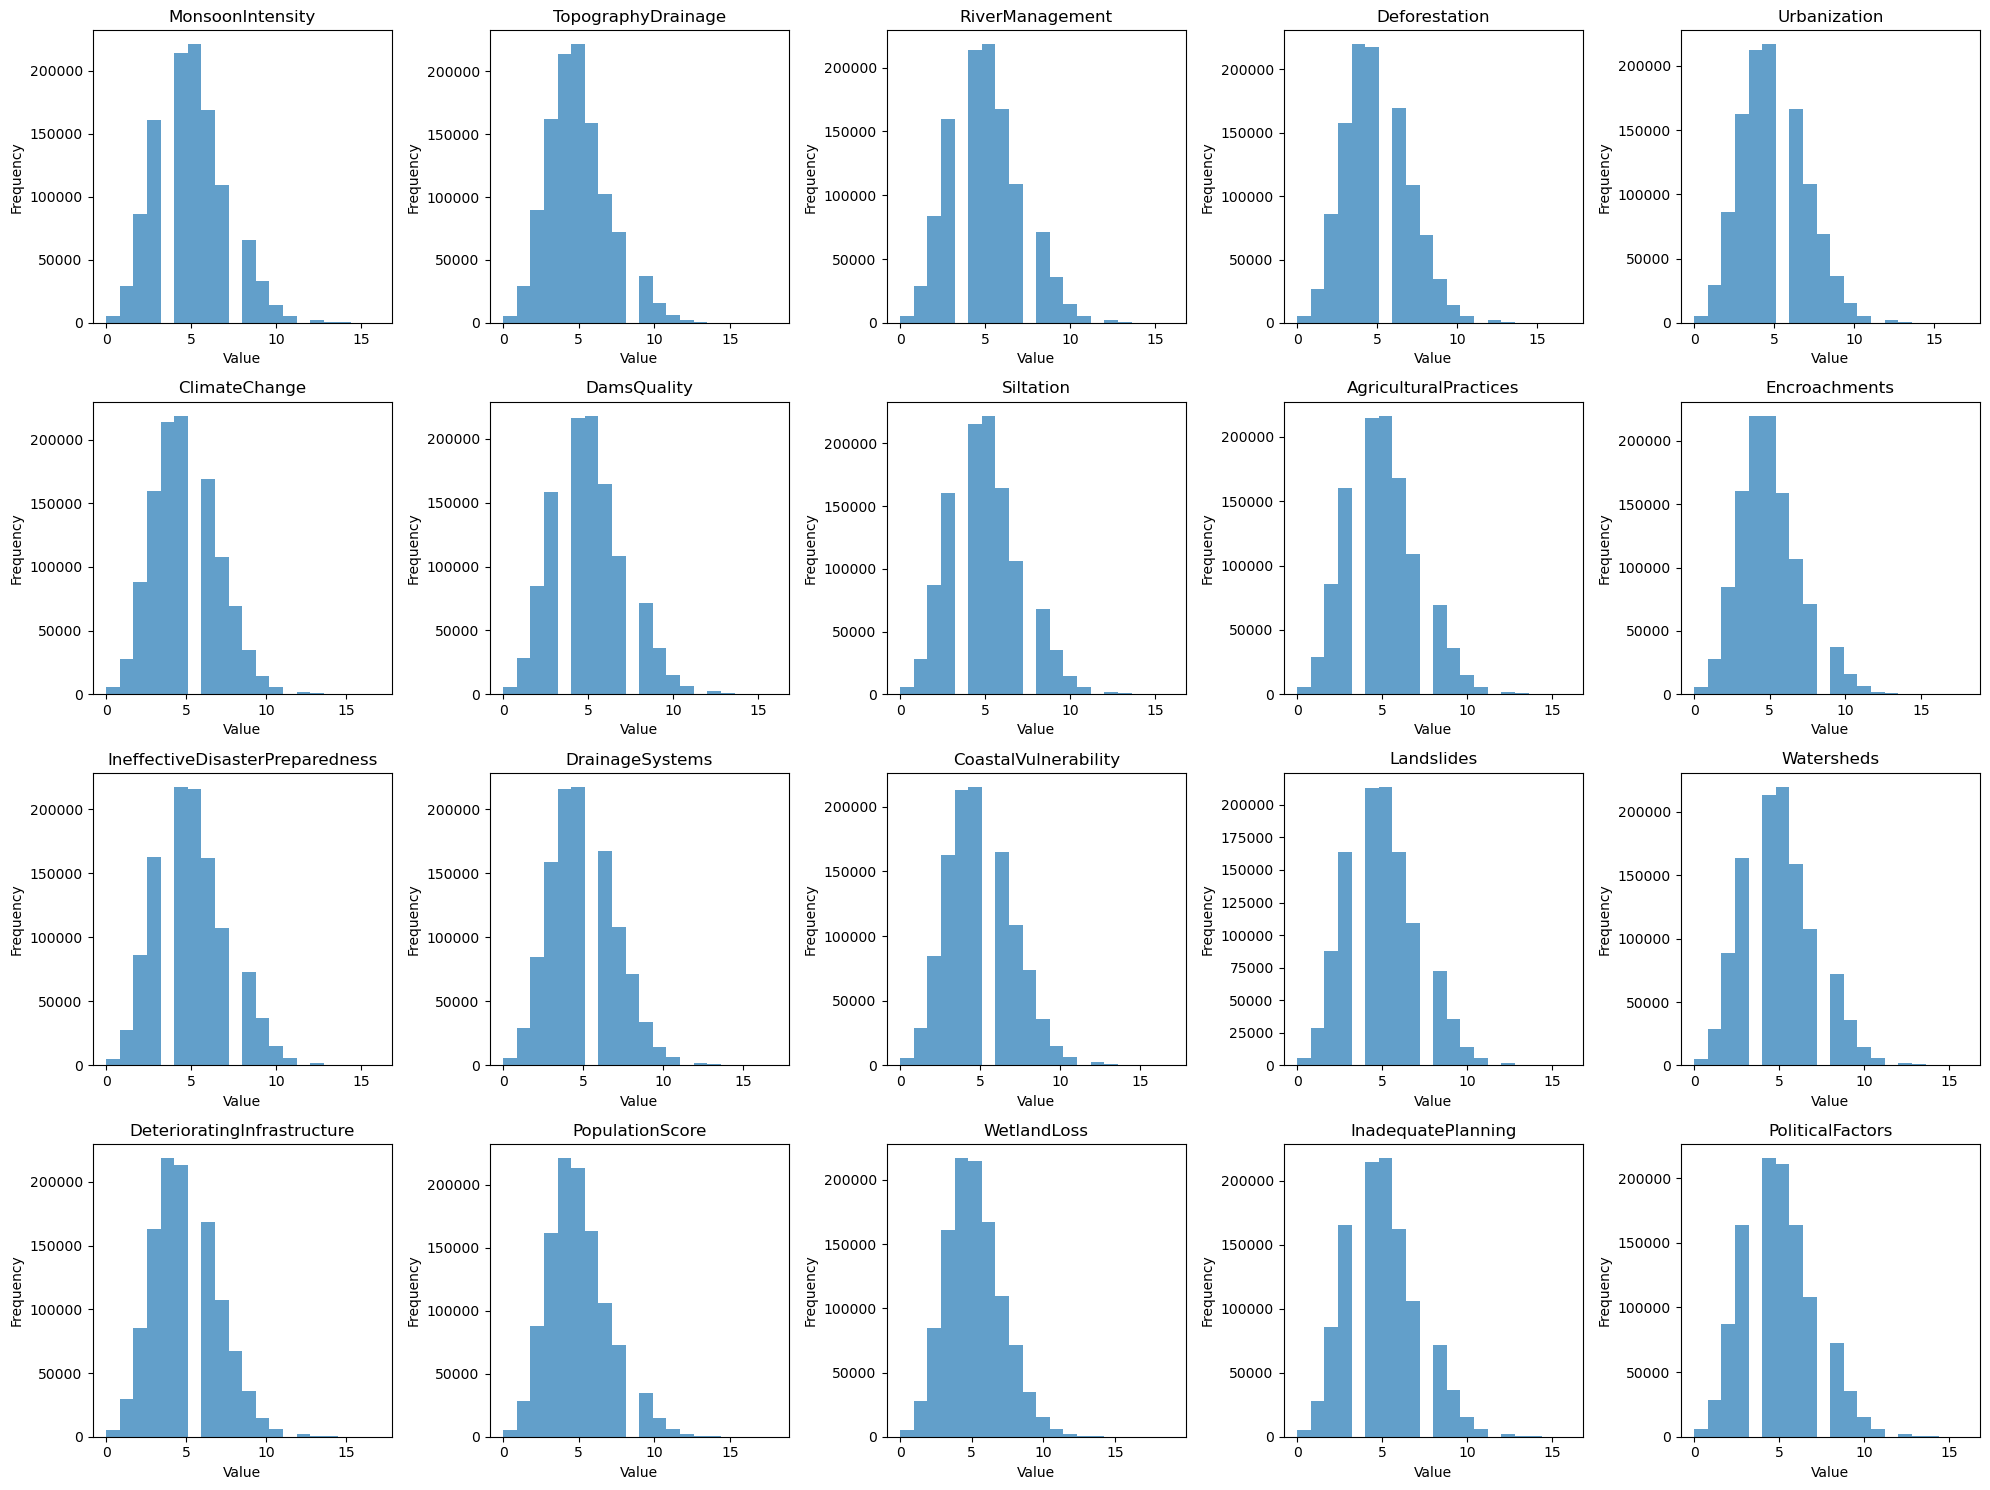

In [ ]:
# Calculate the number of rows and columns for the subplots
num_features = len(features)
num_rows = 4  # You can adjust this based on your preference
num_cols = num_features // num_rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

# Flatten the axes if needed
if num_features > 1:
    axes = axes.flatten()

# Plot histograms for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    ax.hist(train[feature], bins=20, alpha=0.7)
    ax.set_title(feature)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

### Density Plot

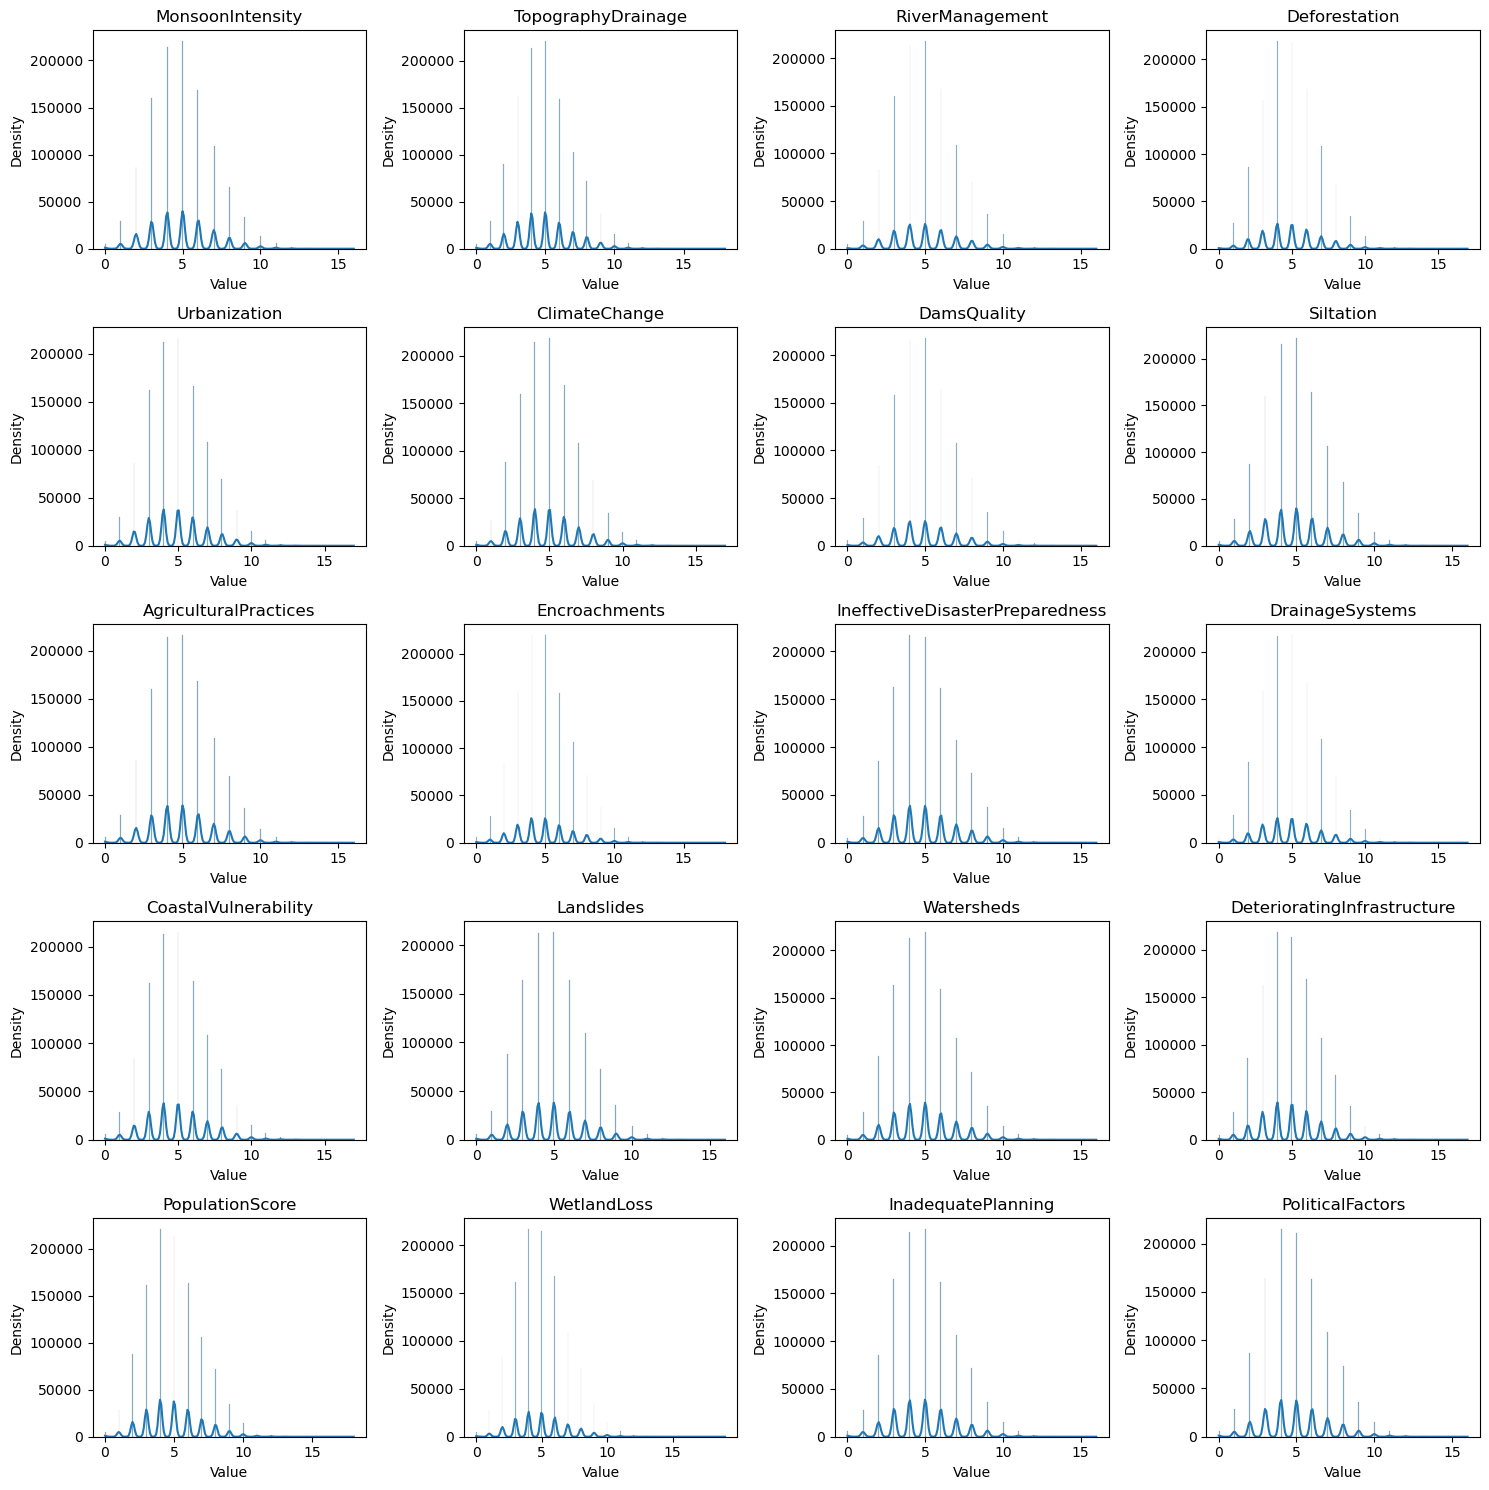

In [ ]:
# Calculate the number of rows and columns for the subplots
num_features = len(features)
num_rows = 5  # You can adjust this based on your preference
num_cols = num_features // num_rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes if needed
if num_features > 1:
    axes = axes.flatten()

# Plot density plots for each feature using Seaborn
for i, feature in enumerate(features):
    ax = axes[i]
    sns.histplot(data=train[feature], kde=True, ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

### Boxplot

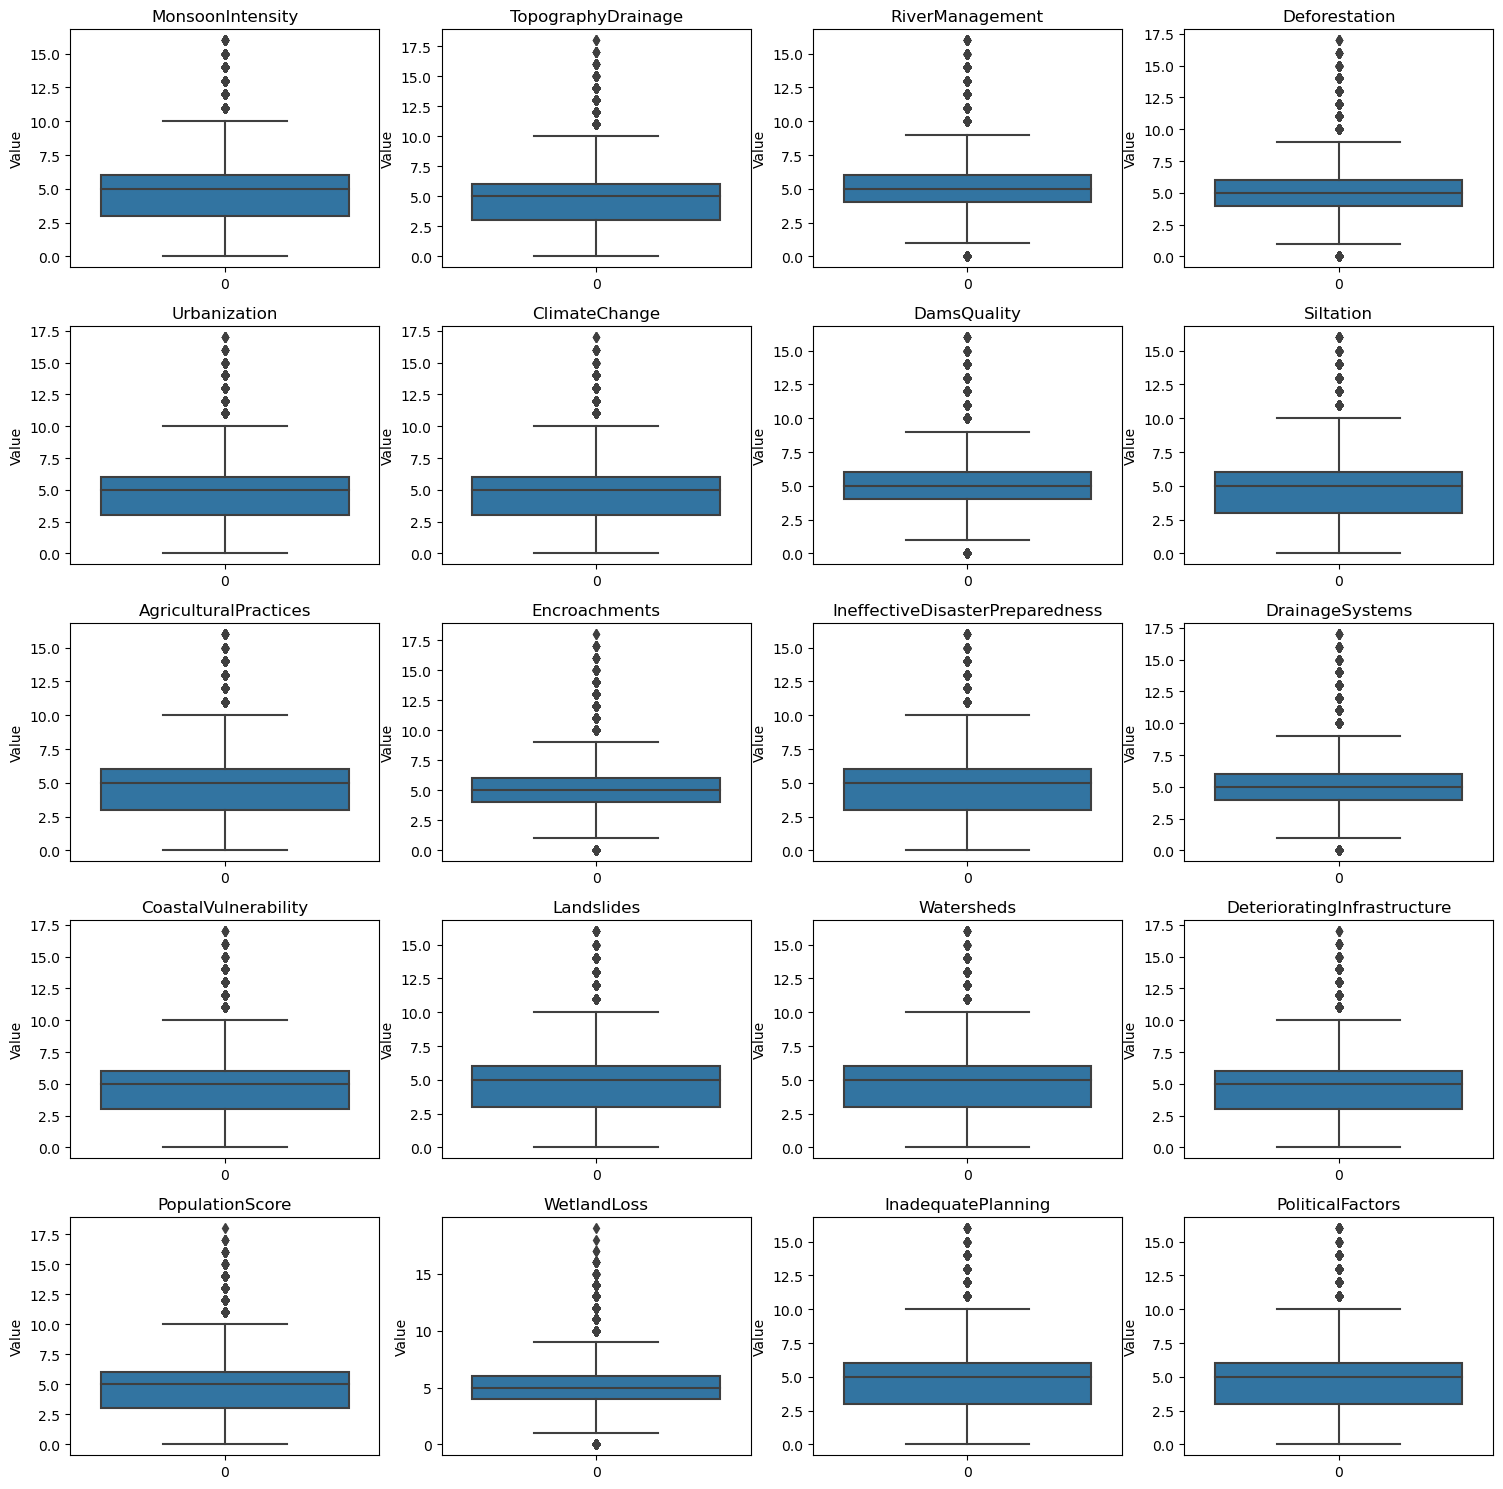

In [ ]:
# Calculate the number of rows and columns for the subplots
num_features = len(features)
num_rows = 5  # You can adjust this based on your preference
num_cols = num_features // num_rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes if needed
if num_features > 1:
    axes = axes.flatten()

# Plot box plots for each feature using Seaborn
for i, feature in enumerate(features):
    ax = axes[i]
    sns.boxplot(data=train[feature], ax=ax)
    ax.set_title(feature)
    ax.set_ylabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()

### Countplot

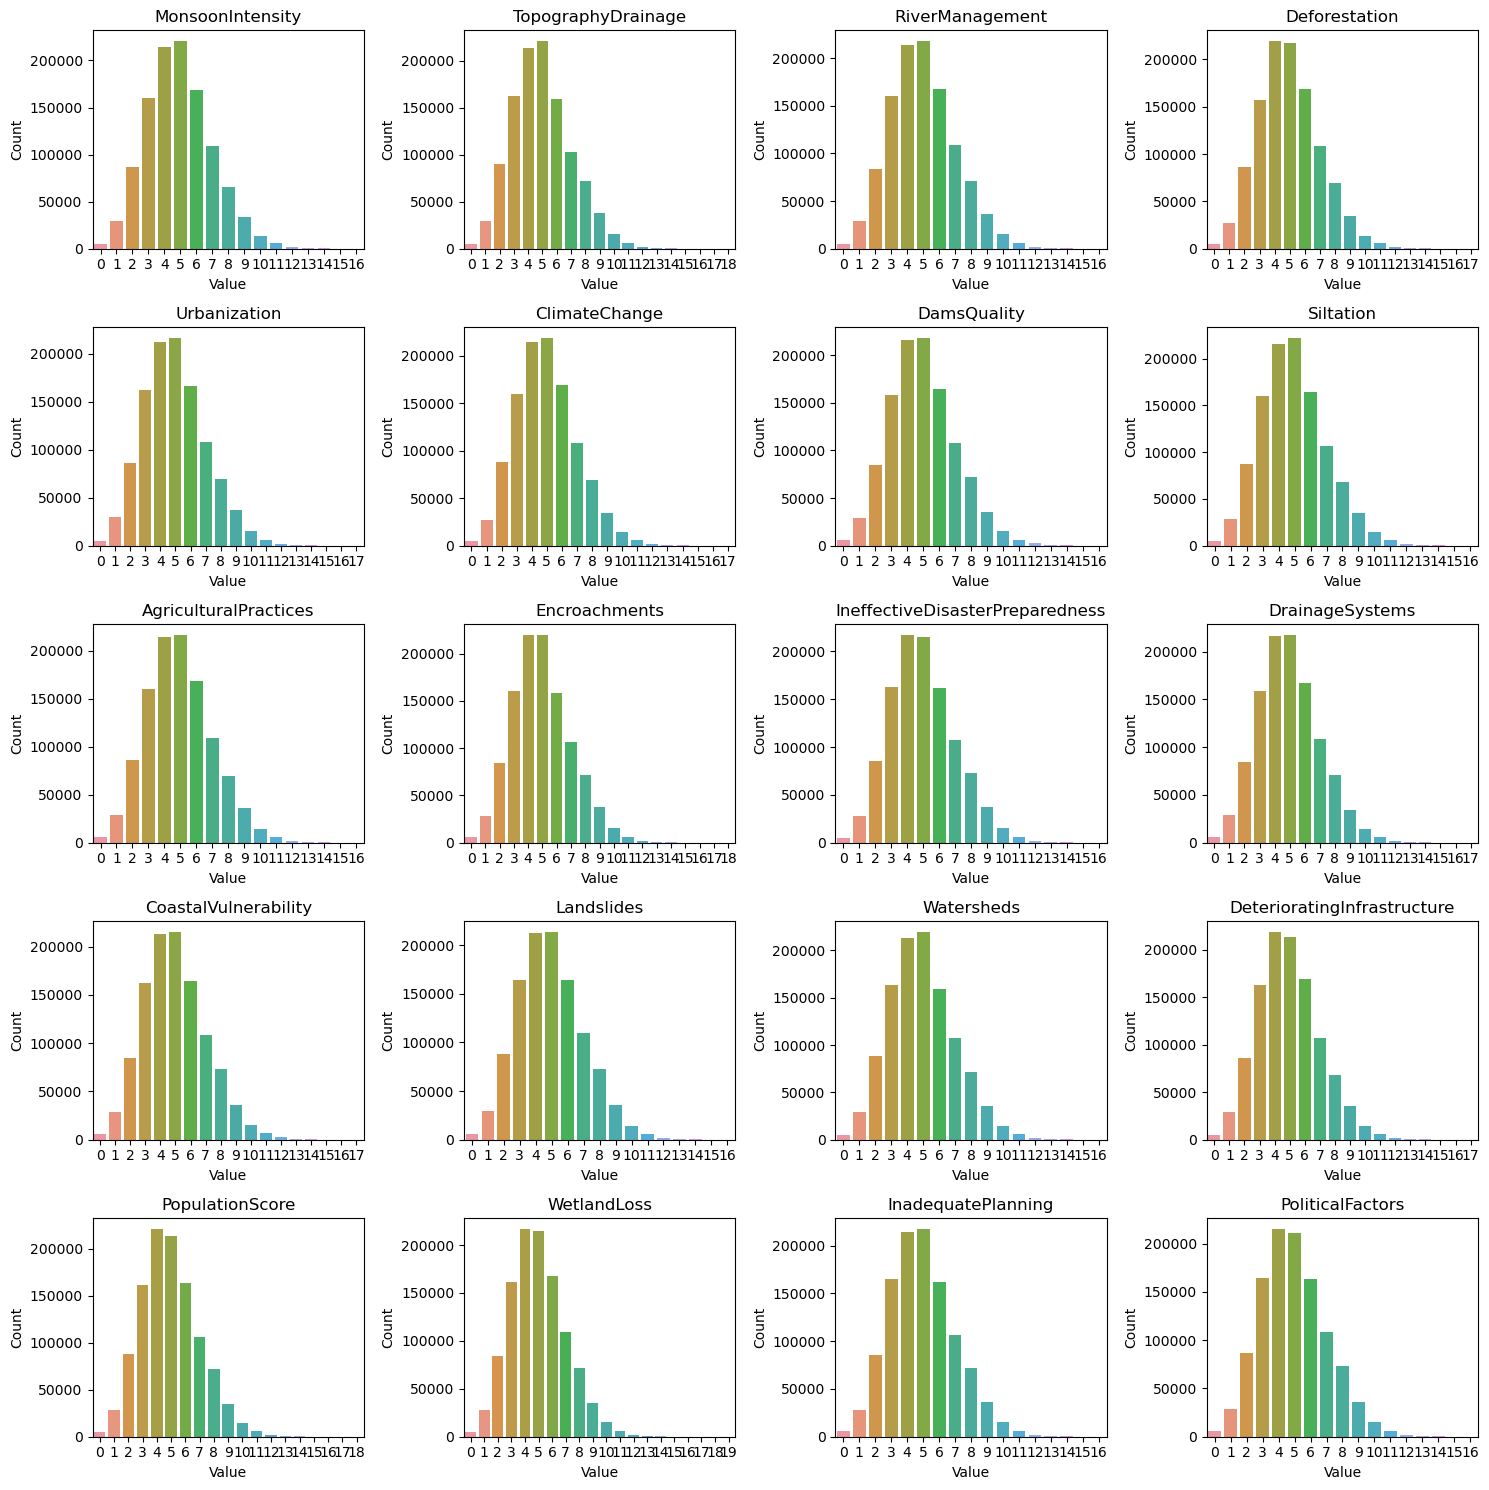

In [ ]:
# Calculate the number of rows and columns for the subplots
num_features = len(features)
num_rows = 5  # You can adjust this based on your preference
num_cols = num_features // num_rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes if needed
if num_features > 1:
    axes = axes.flatten()

# Plot count plots for each feature using Seaborn
for i, feature in enumerate(features):
    ax = axes[i]
    sns.countplot(data=train, x=feature, ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

### Pairplot

c:\Users\timmy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\timmy\AppData\Local\Temp\ipykernel_25936\1473453665.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


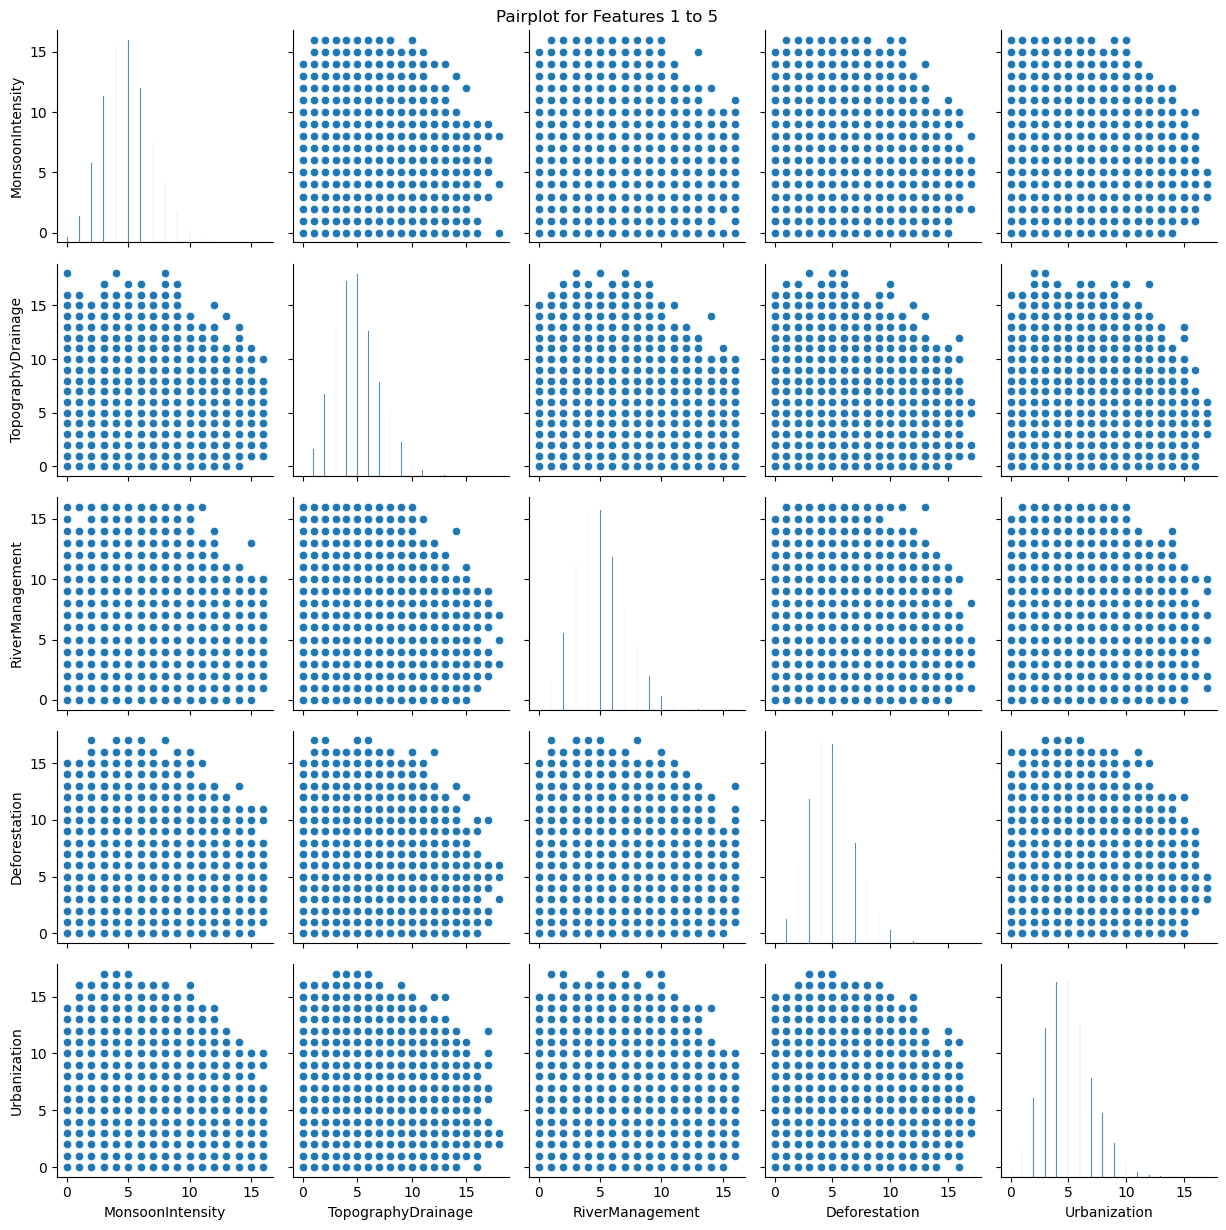

c:\Users\timmy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\timmy\AppData\Local\Temp\ipykernel_25936\1473453665.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


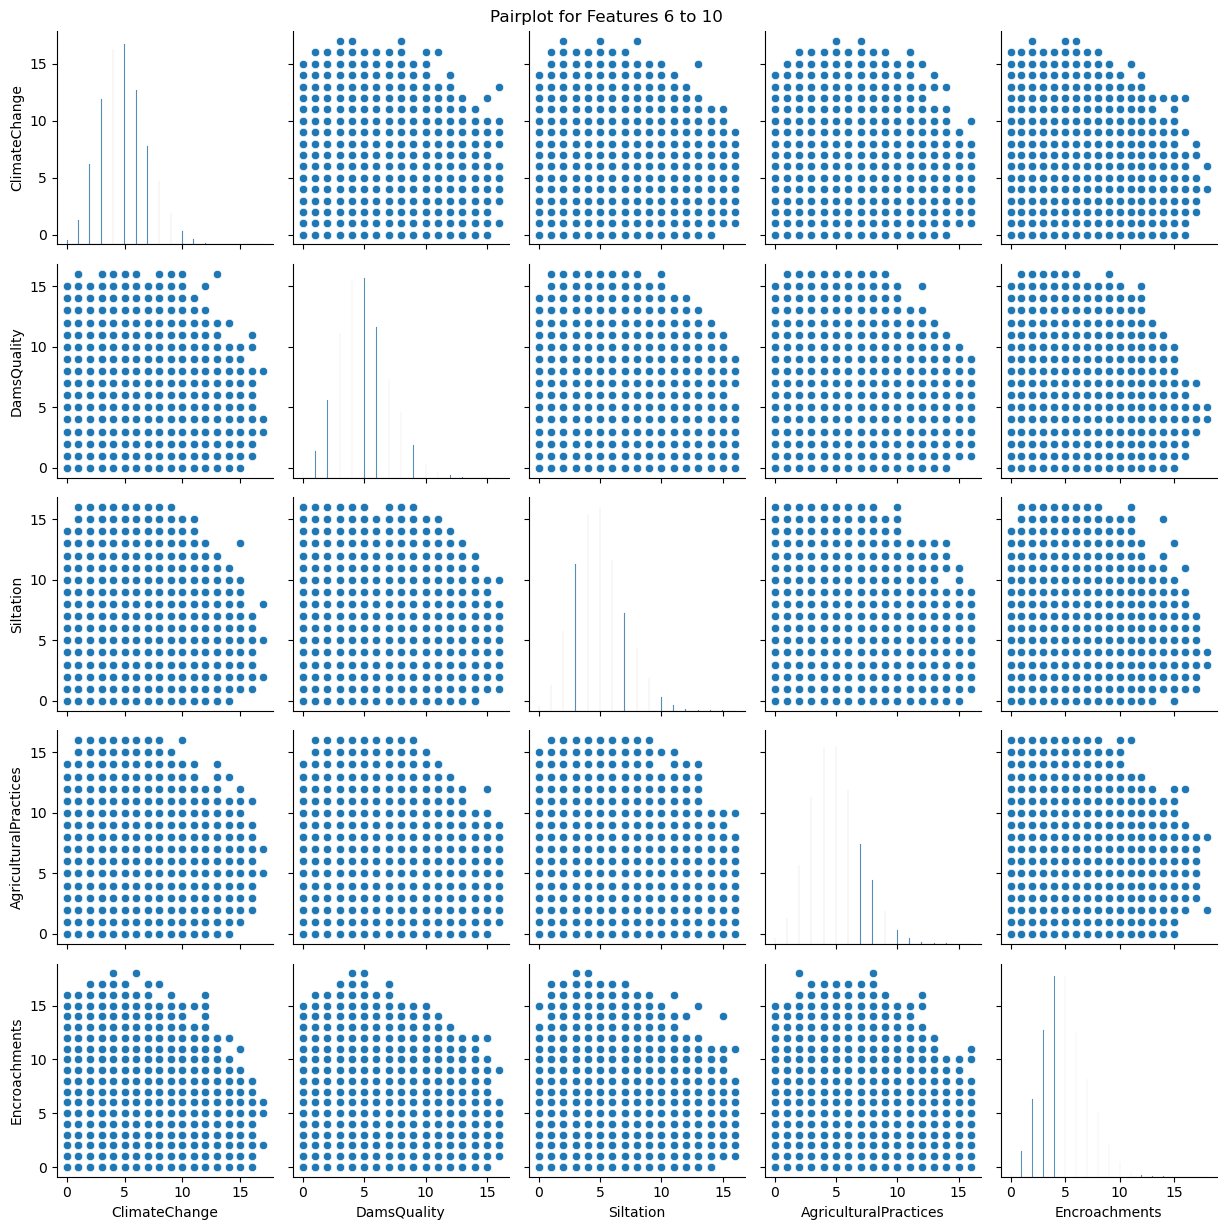

c:\Users\timmy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\timmy\AppData\Local\Temp\ipykernel_25936\1473453665.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


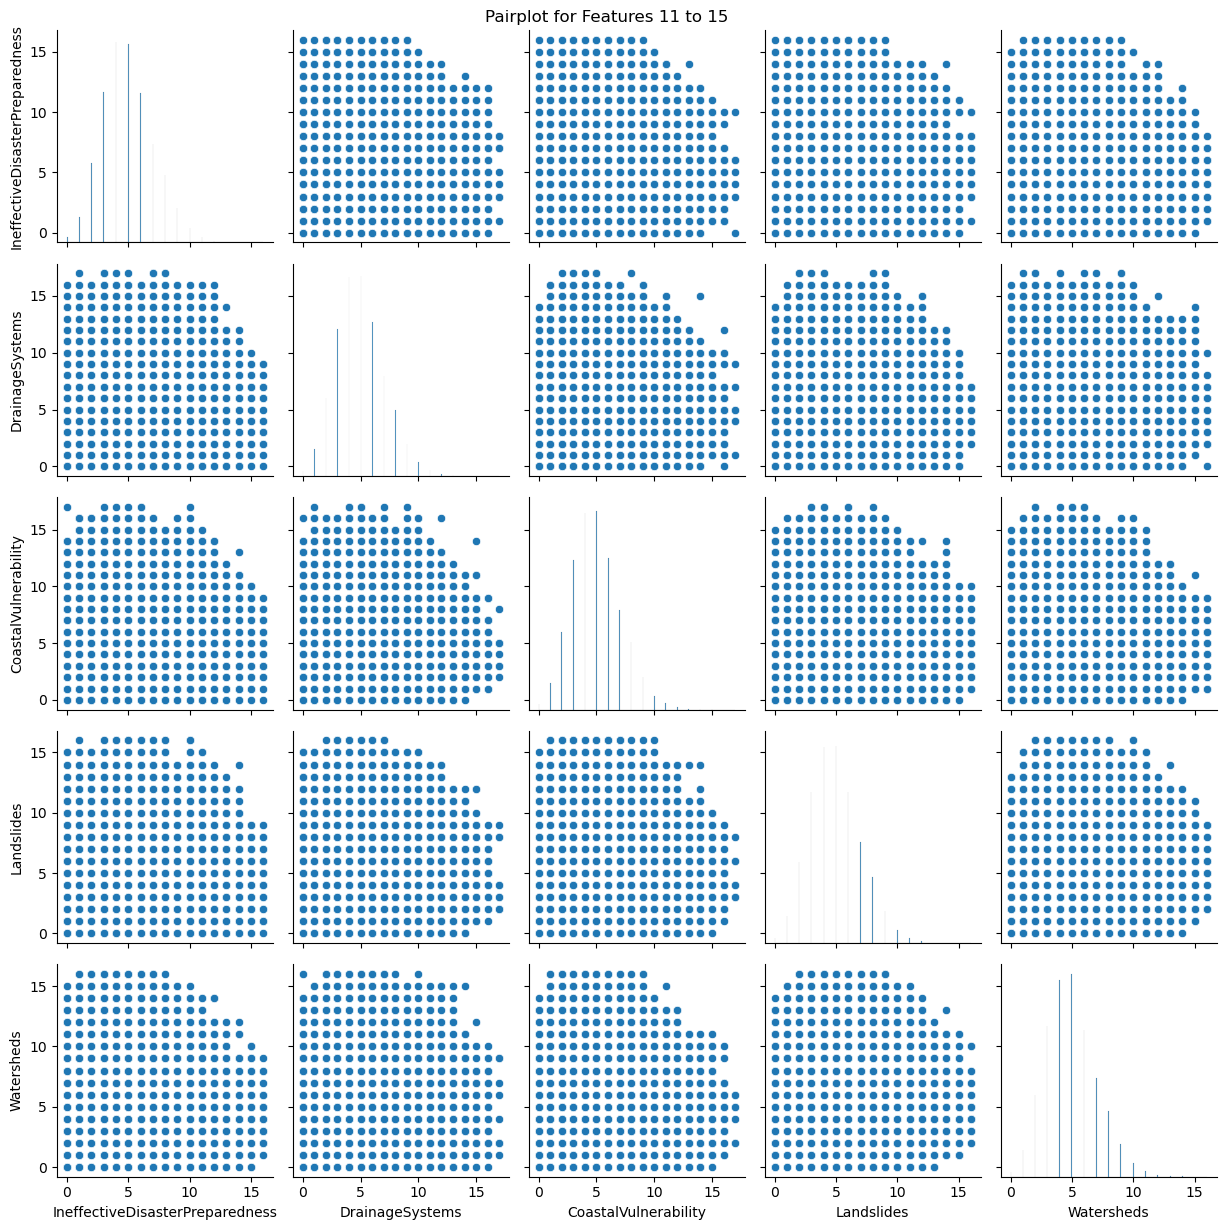

c:\Users\timmy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\timmy\AppData\Local\Temp\ipykernel_25936\1473453665.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


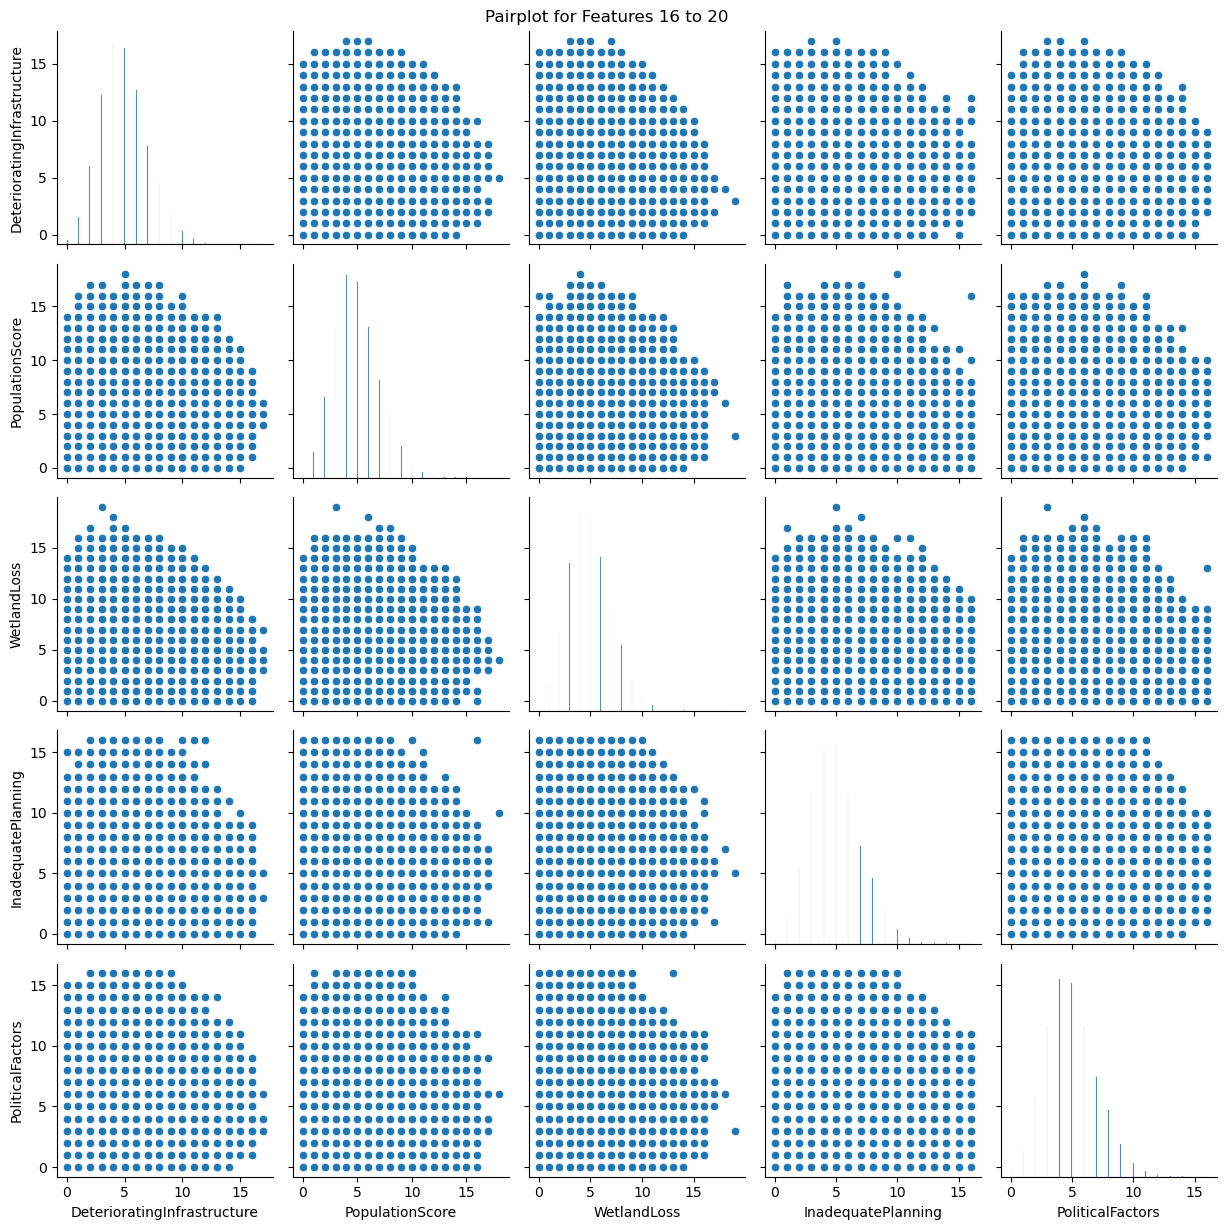

In [ ]:
# Calculate the number of rows and columns for the subplots
num_features = len(features)
num_cols = 5  # Number of features to include in each pair plot

# Calculate the number of pair plots
num_pair_plots = num_features // num_cols
if num_features % num_cols != 0:
    num_pair_plots += 1

# Create pair plots for every five features
for i in range(num_pair_plots):
    start_idx = i * num_cols
    end_idx = min((i + 1) * num_cols, num_features)
    selected_features = features[start_idx:end_idx]
    sns.pairplot(train[selected_features])
    plt.suptitle(f'Pairplot for Features {start_idx + 1} to {end_idx}')
    # Adjust layout
    plt.tight_layout()
    plt.show()


### Heatmap

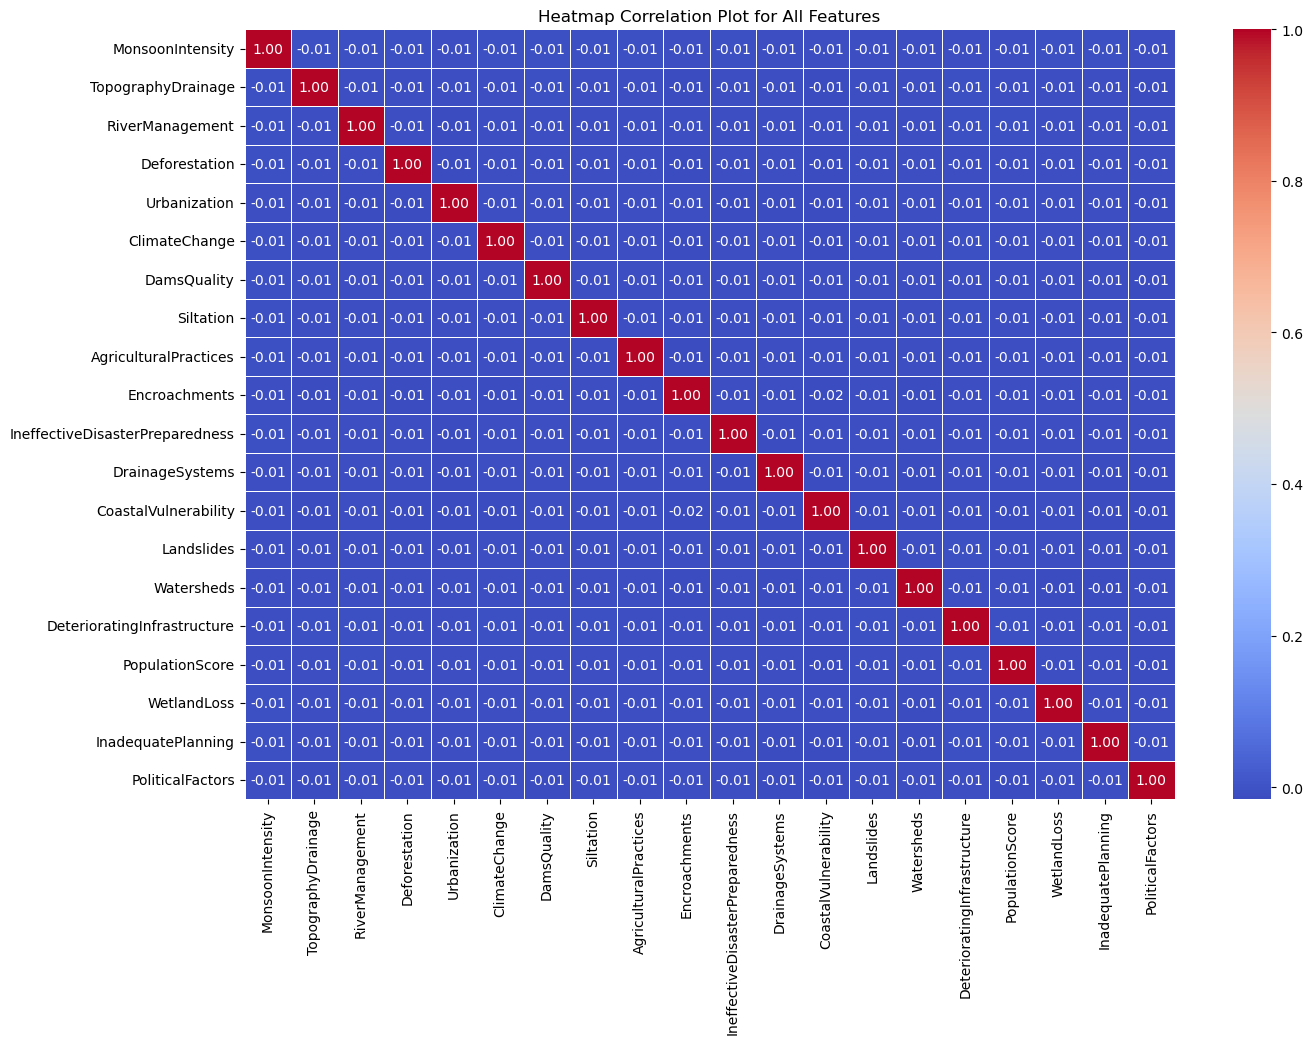

In [ ]:
# Calculate the correlation matrix
correlation_matrix = train[features].corr()

# Plot the heatmap correlation plot
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Correlation Plot for All Features')
plt.show()

## Visualization Inference

- 1. There's no correlation between the features of the dataset
- 2. There's a lot of outliers flagged in the data. 
- 3. The features of the data are really skewed, a lot of them appear between 2-10. So 11-19 are seen as outliers in most cases. 
- 4. There's no significant linear relation between the features and the target variable which is Flood Probability.

## Data Cleaning

In [17]:
# checking for missing values
train.isna().sum()

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [18]:
# chekcing for duplicates 
train.duplicated().sum()

0

### Preprocessing

### Trying all preprocessing methods

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

In [20]:
# sepearting the features and the target variable
X = train.drop(columns=['id', 'FloodProbability'])
y = train['FloodProbability']

In [21]:
# scaling with standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# presenting in a dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,0.038198,1.467769,0.021561,1.490363,0.507578,-0.453941,-0.458881,-0.933107,-0.939124,-0.455632,-1.417247,0.025627,-0.935421,-0.929312,0.034080,-0.448422,0.999183,0.023754,0.989569,-0.927598
1,0.524488,0.990186,-0.461022,-0.459251,1.467552,1.489938,-0.938943,0.034951,-0.455692,0.504372,1.951149,0.990723,-1.414142,-2.372809,-0.926353,0.035884,-0.929294,-0.943039,-0.451962,-0.927598
2,0.524488,0.035021,0.504143,1.002959,-0.932383,1.003968,-1.899068,0.034951,-0.455692,0.024370,0.507551,0.990723,-0.935421,0.995351,0.034080,0.520189,1.481302,-1.426435,-0.932472,-0.927598
3,-0.934382,-0.442562,0.504143,0.028152,-0.452396,1.489938,-0.458881,1.003010,0.511171,1.464377,0.026351,-1.422018,-0.456700,0.995351,-0.446137,-0.448422,0.517064,0.023754,0.989569,0.029180
4,0.038198,-0.920145,-1.426186,0.515556,-0.452396,-0.453941,-0.938943,-0.933107,-0.939124,-0.935635,0.026351,-1.422018,-1.414142,0.514185,0.514296,-0.448422,-1.893533,-1.426435,-0.932472,0.029180


array([[<Axes: title={'center': 'MonsoonIntensity'}>,
        <Axes: title={'center': 'TopographyDrainage'}>,
        <Axes: title={'center': 'RiverManagement'}>,
        <Axes: title={'center': 'Deforestation'}>],
       [<Axes: title={'center': 'Urbanization'}>,
        <Axes: title={'center': 'ClimateChange'}>,
        <Axes: title={'center': 'DamsQuality'}>,
        <Axes: title={'center': 'Siltation'}>],
       [<Axes: title={'center': 'AgriculturalPractices'}>,
        <Axes: title={'center': 'Encroachments'}>,
        <Axes: title={'center': 'IneffectiveDisasterPreparedness'}>,
        <Axes: title={'center': 'DrainageSystems'}>],
       [<Axes: title={'center': 'CoastalVulnerability'}>,
        <Axes: title={'center': 'Landslides'}>,
        <Axes: title={'center': 'Watersheds'}>,
        <Axes: title={'center': 'DeterioratingInfrastructure'}>],
       [<Axes: title={'center': 'PopulationScore'}>,
        <Axes: title={'center': 'WetlandLoss'}>,
        <Axes: title={'center': 

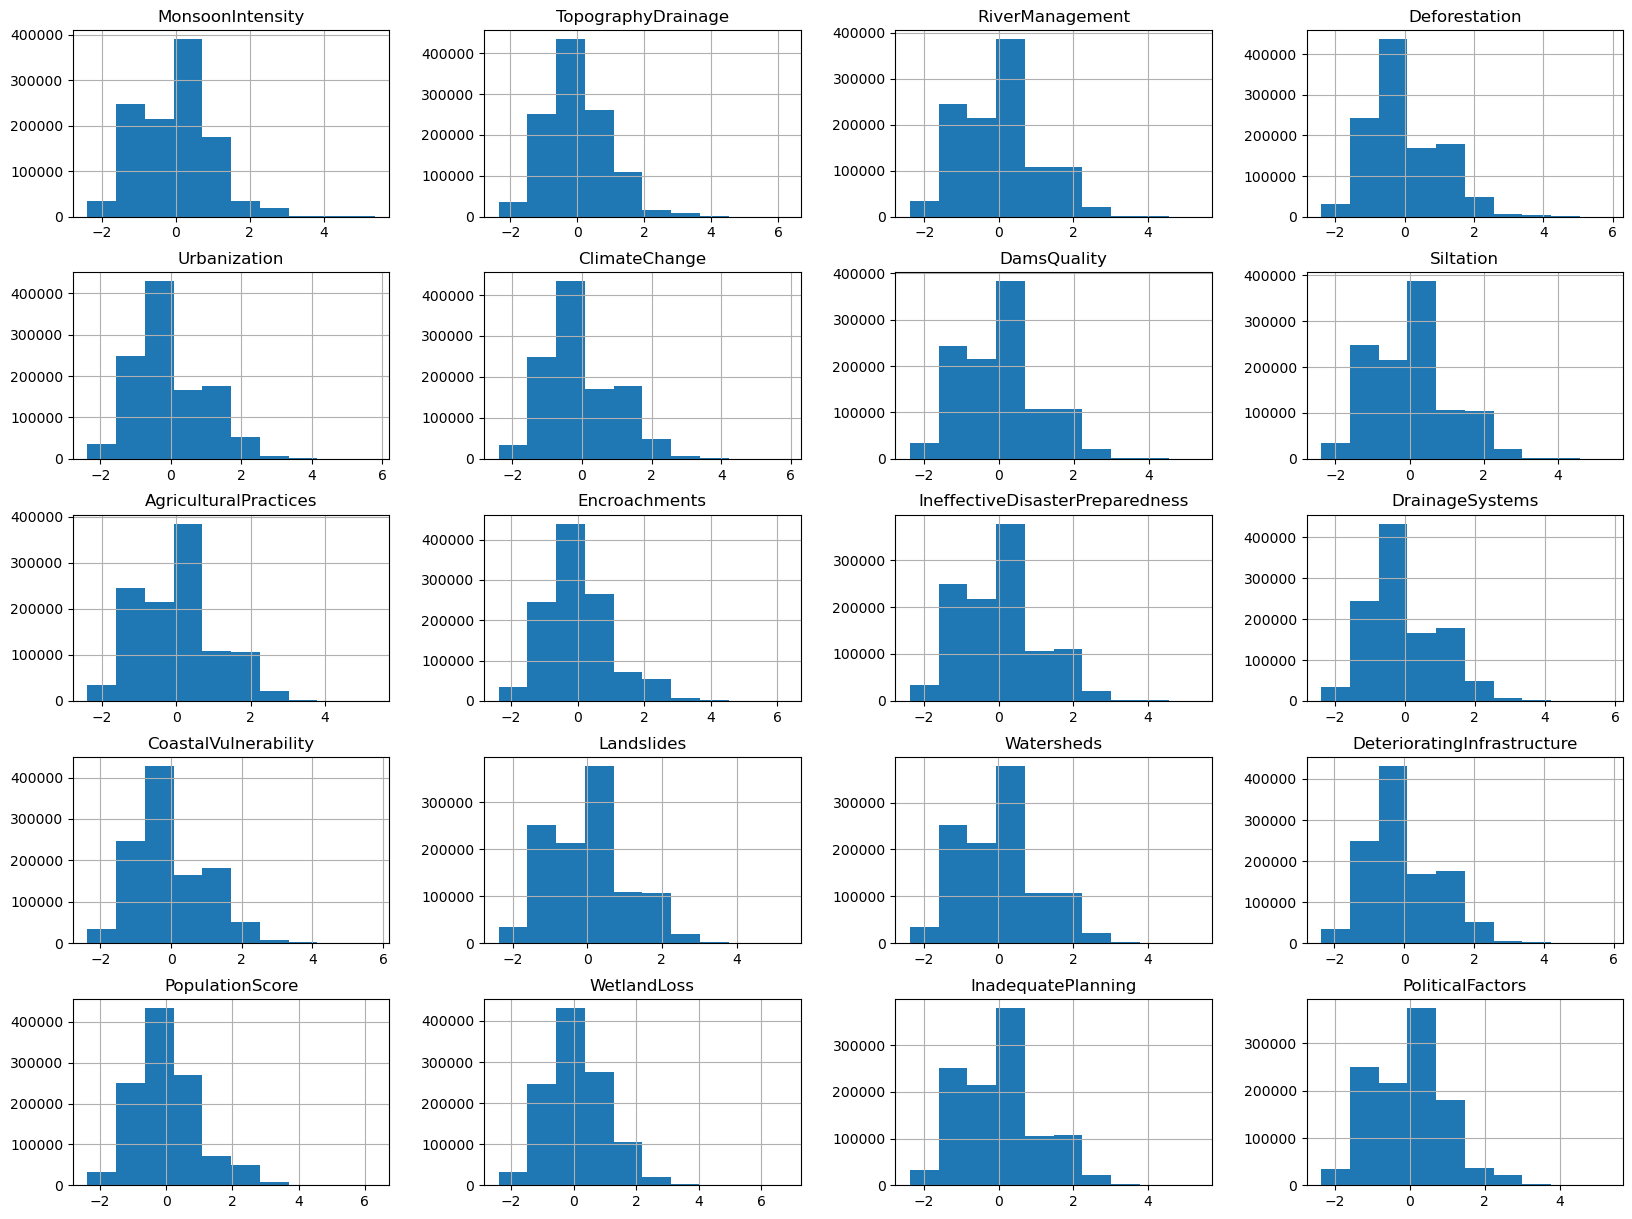

In [22]:
# histogram to visualize what has been done.
X_scaled.hist(figsize=(20, 15))

In [23]:
# scaling with minmax scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# presenting in a dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,0.3125,0.444444,0.3125,0.470588,0.352941,0.235294,0.2500,0.1875,0.1875,0.222222,0.1250,0.294118,0.176471,0.1875,0.3125,0.235294,0.388889,0.263158,0.4375,0.1875
1,0.3750,0.388889,0.2500,0.235294,0.470588,0.470588,0.1875,0.3125,0.2500,0.333333,0.5625,0.411765,0.117647,0.0000,0.1875,0.294118,0.166667,0.157895,0.2500,0.1875
2,0.3750,0.277778,0.3750,0.411765,0.176471,0.411765,0.0625,0.3125,0.2500,0.277778,0.3750,0.411765,0.176471,0.4375,0.3125,0.352941,0.444444,0.105263,0.1875,0.1875
3,0.1875,0.222222,0.3750,0.294118,0.235294,0.470588,0.2500,0.4375,0.3750,0.444444,0.3125,0.117647,0.235294,0.4375,0.2500,0.235294,0.333333,0.263158,0.4375,0.3125
4,0.3125,0.166667,0.1250,0.352941,0.235294,0.235294,0.1875,0.1875,0.1875,0.166667,0.3125,0.117647,0.117647,0.3750,0.3750,0.235294,0.055556,0.105263,0.1875,0.3125


array([[<Axes: title={'center': 'MonsoonIntensity'}>,
        <Axes: title={'center': 'TopographyDrainage'}>,
        <Axes: title={'center': 'RiverManagement'}>,
        <Axes: title={'center': 'Deforestation'}>],
       [<Axes: title={'center': 'Urbanization'}>,
        <Axes: title={'center': 'ClimateChange'}>,
        <Axes: title={'center': 'DamsQuality'}>,
        <Axes: title={'center': 'Siltation'}>],
       [<Axes: title={'center': 'AgriculturalPractices'}>,
        <Axes: title={'center': 'Encroachments'}>,
        <Axes: title={'center': 'IneffectiveDisasterPreparedness'}>,
        <Axes: title={'center': 'DrainageSystems'}>],
       [<Axes: title={'center': 'CoastalVulnerability'}>,
        <Axes: title={'center': 'Landslides'}>,
        <Axes: title={'center': 'Watersheds'}>,
        <Axes: title={'center': 'DeterioratingInfrastructure'}>],
       [<Axes: title={'center': 'PopulationScore'}>,
        <Axes: title={'center': 'WetlandLoss'}>,
        <Axes: title={'center': 

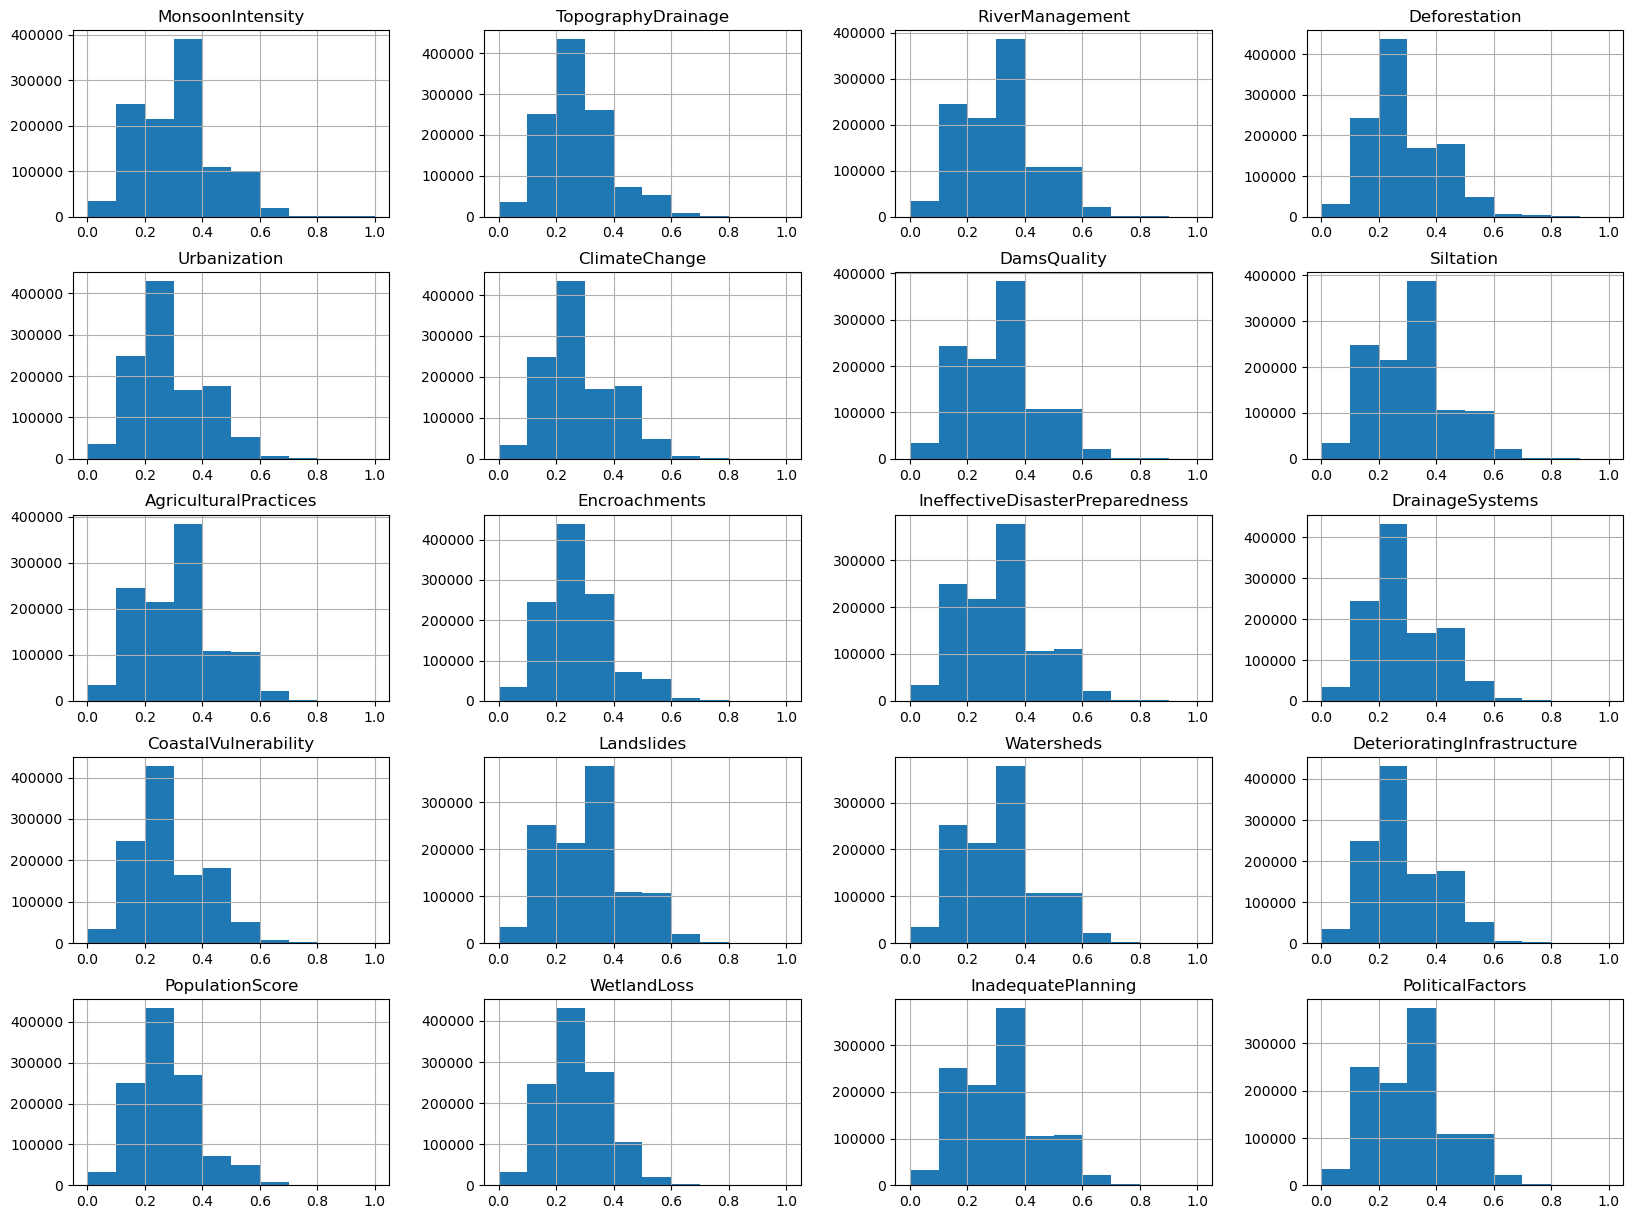

In [24]:
# histogram to visualize what has been done.
X_scaled.hist(figsize=(20, 15))

In [25]:
# scaling with robust scaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
# presenting in a dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,0.000000,1.000000,0.0,1.5,0.333333,-0.333333,-0.5,-0.666667,-0.666667,-0.5,-1.000000,0.0,-0.666667,-0.666667,0.000000,-0.333333,0.666667,0.0,0.666667,-0.666667
1,0.333333,0.666667,-0.5,-0.5,1.000000,1.000000,-1.0,0.000000,-0.333333,0.5,1.333333,1.0,-1.000000,-1.666667,-0.666667,0.000000,-0.666667,-1.0,-0.333333,-0.666667
2,0.333333,0.000000,0.5,1.0,-0.666667,0.666667,-2.0,0.000000,-0.333333,0.0,0.333333,1.0,-0.666667,0.666667,0.000000,0.333333,1.000000,-1.5,-0.666667,-0.666667
3,-0.666667,-0.333333,0.5,0.0,-0.333333,1.000000,-0.5,0.666667,0.333333,1.5,0.000000,-1.5,-0.333333,0.666667,-0.333333,-0.333333,0.333333,0.0,0.666667,0.000000
4,0.000000,-0.666667,-1.5,0.5,-0.333333,-0.333333,-1.0,-0.666667,-0.666667,-1.0,0.000000,-1.5,-1.000000,0.333333,0.333333,-0.333333,-1.333333,-1.5,-0.666667,0.000000


array([[<Axes: title={'center': 'MonsoonIntensity'}>,
        <Axes: title={'center': 'TopographyDrainage'}>,
        <Axes: title={'center': 'RiverManagement'}>,
        <Axes: title={'center': 'Deforestation'}>],
       [<Axes: title={'center': 'Urbanization'}>,
        <Axes: title={'center': 'ClimateChange'}>,
        <Axes: title={'center': 'DamsQuality'}>,
        <Axes: title={'center': 'Siltation'}>],
       [<Axes: title={'center': 'AgriculturalPractices'}>,
        <Axes: title={'center': 'Encroachments'}>,
        <Axes: title={'center': 'IneffectiveDisasterPreparedness'}>,
        <Axes: title={'center': 'DrainageSystems'}>],
       [<Axes: title={'center': 'CoastalVulnerability'}>,
        <Axes: title={'center': 'Landslides'}>,
        <Axes: title={'center': 'Watersheds'}>,
        <Axes: title={'center': 'DeterioratingInfrastructure'}>],
       [<Axes: title={'center': 'PopulationScore'}>,
        <Axes: title={'center': 'WetlandLoss'}>,
        <Axes: title={'center': 

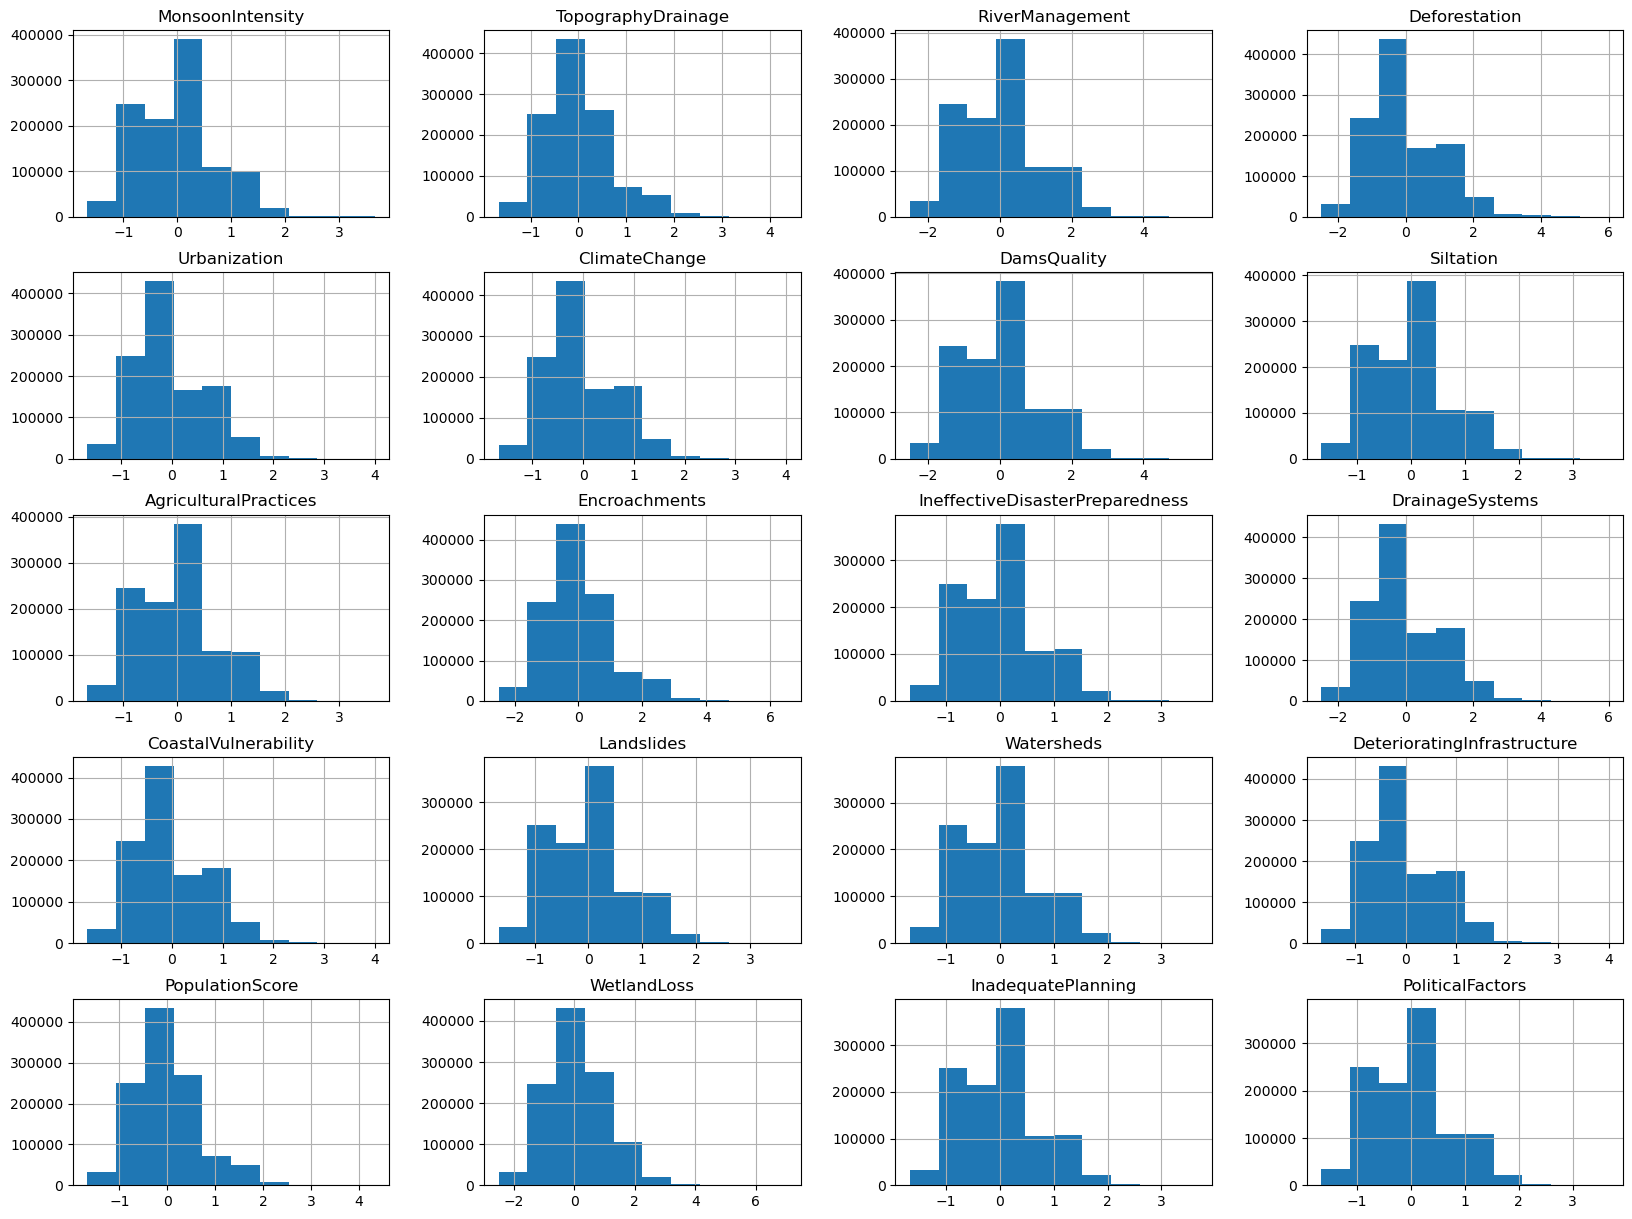

In [26]:
# histogram to visualize what has been done.
X_scaled.hist(figsize=(20, 15))

In [27]:
# scaling with normalizer
scaler = Normalizer()
X_scaled = scaler.fit_transform(X)
# presenting in a dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,0.223607,0.357771,0.223607,0.357771,0.268328,0.178885,0.178885,0.134164,0.134164,0.178885,0.089443,0.223607,0.134164,0.134164,0.223607,0.178885,0.313050,0.223607,0.313050,0.134164
1,0.257722,0.300676,0.171815,0.171815,0.343629,0.343629,0.128861,0.214768,0.171815,0.257722,0.386583,0.300676,0.085907,0.000000,0.128861,0.214768,0.128861,0.128861,0.171815,0.128861
2,0.253320,0.211100,0.253320,0.295540,0.126660,0.295540,0.042220,0.211100,0.168880,0.211100,0.253320,0.295540,0.126660,0.295540,0.211100,0.253320,0.337760,0.084440,0.126660,0.126660
3,0.123299,0.164399,0.246598,0.205499,0.164399,0.328798,0.164399,0.287698,0.246598,0.328798,0.205499,0.082199,0.164399,0.287698,0.164399,0.164399,0.246598,0.205499,0.287698,0.205499
4,0.287718,0.172631,0.115087,0.345261,0.230174,0.230174,0.172631,0.172631,0.172631,0.172631,0.287718,0.115087,0.115087,0.345261,0.345261,0.230174,0.057544,0.115087,0.172631,0.287718


array([[<Axes: title={'center': 'MonsoonIntensity'}>,
        <Axes: title={'center': 'TopographyDrainage'}>,
        <Axes: title={'center': 'RiverManagement'}>,
        <Axes: title={'center': 'Deforestation'}>],
       [<Axes: title={'center': 'Urbanization'}>,
        <Axes: title={'center': 'ClimateChange'}>,
        <Axes: title={'center': 'DamsQuality'}>,
        <Axes: title={'center': 'Siltation'}>],
       [<Axes: title={'center': 'AgriculturalPractices'}>,
        <Axes: title={'center': 'Encroachments'}>,
        <Axes: title={'center': 'IneffectiveDisasterPreparedness'}>,
        <Axes: title={'center': 'DrainageSystems'}>],
       [<Axes: title={'center': 'CoastalVulnerability'}>,
        <Axes: title={'center': 'Landslides'}>,
        <Axes: title={'center': 'Watersheds'}>,
        <Axes: title={'center': 'DeterioratingInfrastructure'}>],
       [<Axes: title={'center': 'PopulationScore'}>,
        <Axes: title={'center': 'WetlandLoss'}>,
        <Axes: title={'center': 

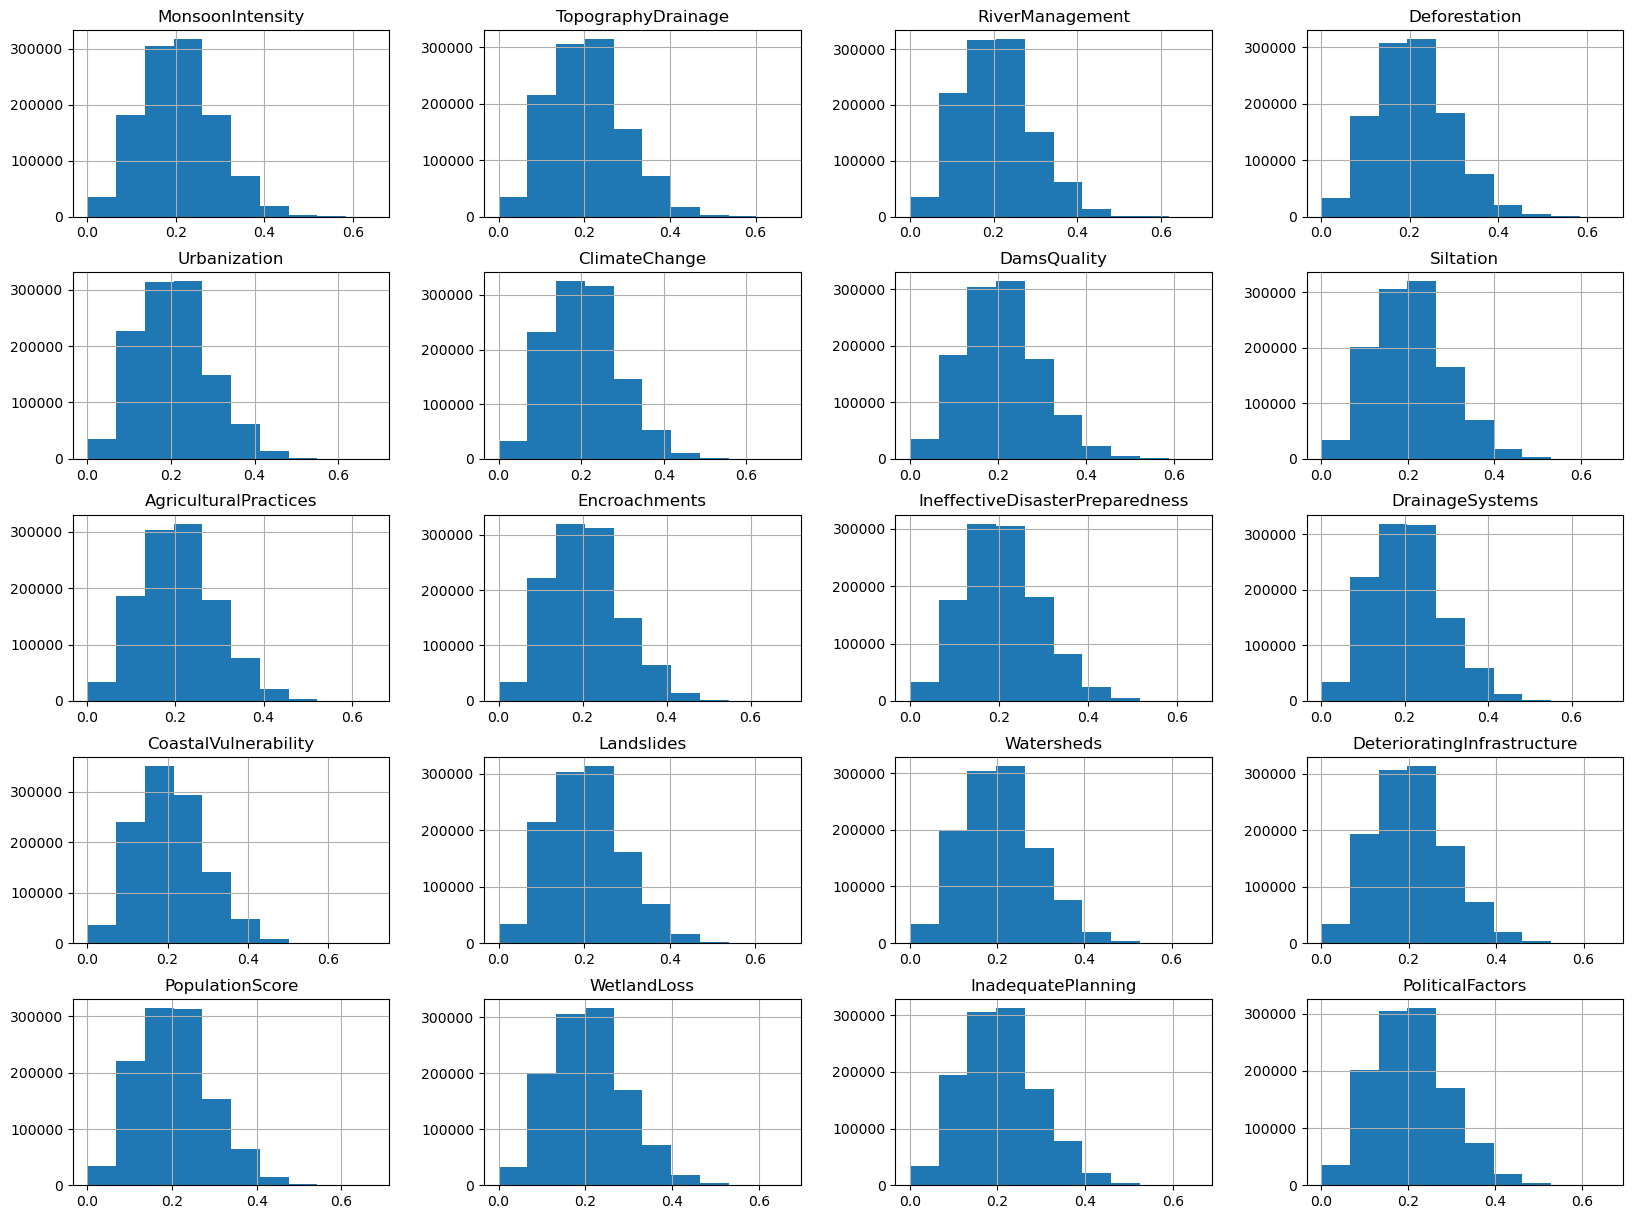

In [28]:
# histogram to visualize what has been done.
X_scaled.hist(figsize=(20, 15))

### Modeling

In [29]:
from sklearn.model_selection import train_test_split

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
X_train

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
805665,8,7,7,6,4,3,13,8,3,2,5,6,6,6,5,5,2,6,4,7
863045,7,4,4,2,4,5,7,3,6,2,2,6,5,0,6,2,5,4,3,4
496045,6,5,1,6,6,7,3,5,6,4,4,5,7,6,5,4,9,3,5,3
1079364,4,6,6,3,3,3,1,5,4,6,7,9,6,2,5,4,7,7,4,1
191800,6,3,8,2,7,4,6,6,7,6,3,5,2,6,6,5,5,4,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,4,7,5,4,4,5,3,8,4,1,5,2,7,3,7,6,2,4,5,5
259178,3,4,6,5,5,7,6,8,2,8,3,7,3,7,9,7,3,2,3,8
131932,5,4,1,2,3,4,6,8,3,3,3,4,5,3,4,5,3,6,7,7
671155,6,10,4,6,3,6,3,3,5,3,5,3,6,6,5,5,4,4,5,5


In [46]:
# importing regression models
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
# catboost
from catboost import CatBoostRegressor
# xgboost
from xgboost import XGBRegressor
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
# Linear Regression
lr = LinearRegression()

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# mean squared error
mse = mean_squared_error(y_test, lr_pred)
# mean absolute error
mae = mean_absolute_error(y_test, lr_pred)
# r2 score
r2 = r2_score(y_test, lr_pred)

print('Linear Regression')
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Linear Regression
Mean Squared Error: 0.00040320658709055805
Mean Absolute Error: 0.015792471363760326
R2 Score: 0.8448773362840329


In [36]:
# decision tree
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

# mean squared error
mse = mean_squared_error(y_test, dt_pred)
# mean absolute error
mae = mean_absolute_error(y_test, dt_pred)
# r2 score
r2 = r2_score(y_test, dt_pred)


In [37]:
print('Decision Tree Regression')
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Decision Tree Regression
Mean Squared Error: 0.002450024374754016
Mean Absolute Error: 0.03940762639092632
R2 Score: 0.05742039106238217


In [ ]:
# # svr
# svr = SVR()

# svr.fit(X_train, y_train)

# svr_pred = svr.predict(X_test)

# # mean squared error
# mse = mean_squared_error(y_test, svr_pred)
# # mean absolute error
# mae = mean_absolute_error(y_test, svr_pred)
# # r2 score
# r2 = r2_score(y_test, svr_pred)

# print('SVR')
# print('Mean Squared Error:', mse)
# print('Mean Absolute Error:', mae)
# print('R2 Score:', r2)

In [ ]:
# # Random Forest
# rf = RandomForestRegressor()

# rf.fit(X_train, y_train)

# rf_pred = rf.predict(X_test)

# # mean squared error

# mse = mean_squared_error(y_test, rf_pred)
# # mean absolute error
# mae = mean_absolute_error(y_test, rf_pred)
# # r2 score
# r2 = r2_score(y_test, rf_pred)

# print('Random Forest')
# print('Mean Squared Error:', mse)
# print('Mean Absolute Error:', mae)
# print('R2 Score:', r2)

In [38]:
# catboost

cat = CatBoostRegressor(random_state=42, verbose=0)

cat.fit(X_train, y_train)

cat_pred = cat.predict(X_test)

# mean squared error
mse = mean_squared_error(y_test, cat_pred)
# mean absolute error
mae = mean_absolute_error(y_test, cat_pred)
# r2 score
r2 = r2_score(y_test, cat_pred)

print('CatBoost')
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

CatBoost
Mean Squared Error: 0.0003998971166367665
Mean Absolute Error: 0.01580226299016561
R2 Score: 0.8461505641744447


In [ ]:
# xgboost

xgb = XGBRegressor(random_state=42)

xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

# mean squared error
mse = mean_squared_error(y_test, xgb_pred)
# mean absolute error
mae = mean_absolute_error(y_test, xgb_pred)
# r2 score
r2 = r2_score(y_test, xgb_pred)

print('XGBoost')
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

In [56]:
# GradientBoostingRegressor

gbm = GradientBoostingRegressor(random_state=42)

gbm.fit(X_train, y_train)

gbm_pred = gbm.predict(X_test)

# mean squared error
mse = mean_squared_error(y_test, gbm_pred)
# mean absolute error
mae = mean_absolute_error(y_test, gbm_pred)
# r2 score
r2 = r2_score(y_test, gbm_pred)

print('GradientBoosting')
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

GradientBoosting
Mean Squared Error: 0.001002567229880375
Mean Absolute Error: 0.026065028902193994
R2 Score: 0.6142897853539955


### Making prediction on the test set.

In [62]:
test.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [64]:
# scaling the test data
test = test

In [65]:
test.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [66]:
# making predictions
predictions = cat.predict(test)

In [67]:
sample

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5
3,1117960,0.5
4,1117961,0.5
...,...,...
745300,1863257,0.5
745301,1863258,0.5
745302,1863259,0.5
745303,1863260,0.5


In [68]:
sample['FloodProbability'] = predictions

sample.head()

,id,FloodProbability
0,1117957,0.574311
1,1117958,0.456400
2,1117959,0.454659
3,1117960,0.466799
4,1117961,0.465791


In [69]:
sample.to_csv('submission.csv', index=False)